<a href="https://colab.research.google.com/github/Shanthan0/java-programming/blob/main/dmtproject(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings


In [ ]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#set the backgroung style sheet
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
#importing the libaries required for data visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics


In [ ]:
#load the csv file in a dataframe using read_csv function
df = pd.read_csv(r"/drug_consumption.csv",encoding="latin-1")


In [ ]:
#make a copy of the dataframe
copy_df = df.copy() 
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [ ]:
#print first 5 rows of the dataset
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
#more information about the data
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
#finding whether there are any null values in the dataset
df.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

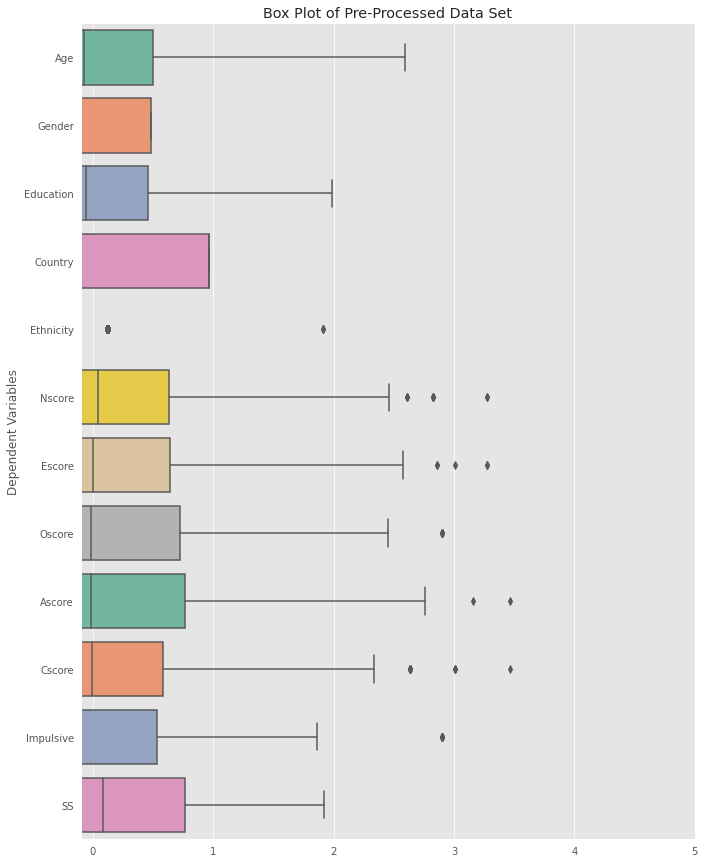

In [ ]:
#data visualization using box plot on dependent variables
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 15))
ax.set(xlim=(-.100, 5))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = df[feature_col_names], orient = 'h', palette = 'Set2')

In [ ]:
#creating 2 more dataframes for each drug
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

In [ ]:
# encoding into numeric data for the original data set
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
# encoding into numeric data for the copied dataset
for column in columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])

In [ ]:
#dataset after encoding
df[columns]

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,0,5
1881,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,0,0
1882,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,0,0
1883,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,0,0


In [ ]:
#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(columns)):
    copy_df.loc[((copy_df[columns[i]]==0) | (copy_df[columns[i]]==1)),cp[i]] = 'Non-user'
    copy_df.loc[((copy_df[columns[i]]==2) | (copy_df[columns[i]]==3) | (copy_df[columns[i]]==4) | (copy_df[columns[i]]==5) | (copy_df[columns[i]]==6)),cp[i]] = 'User'

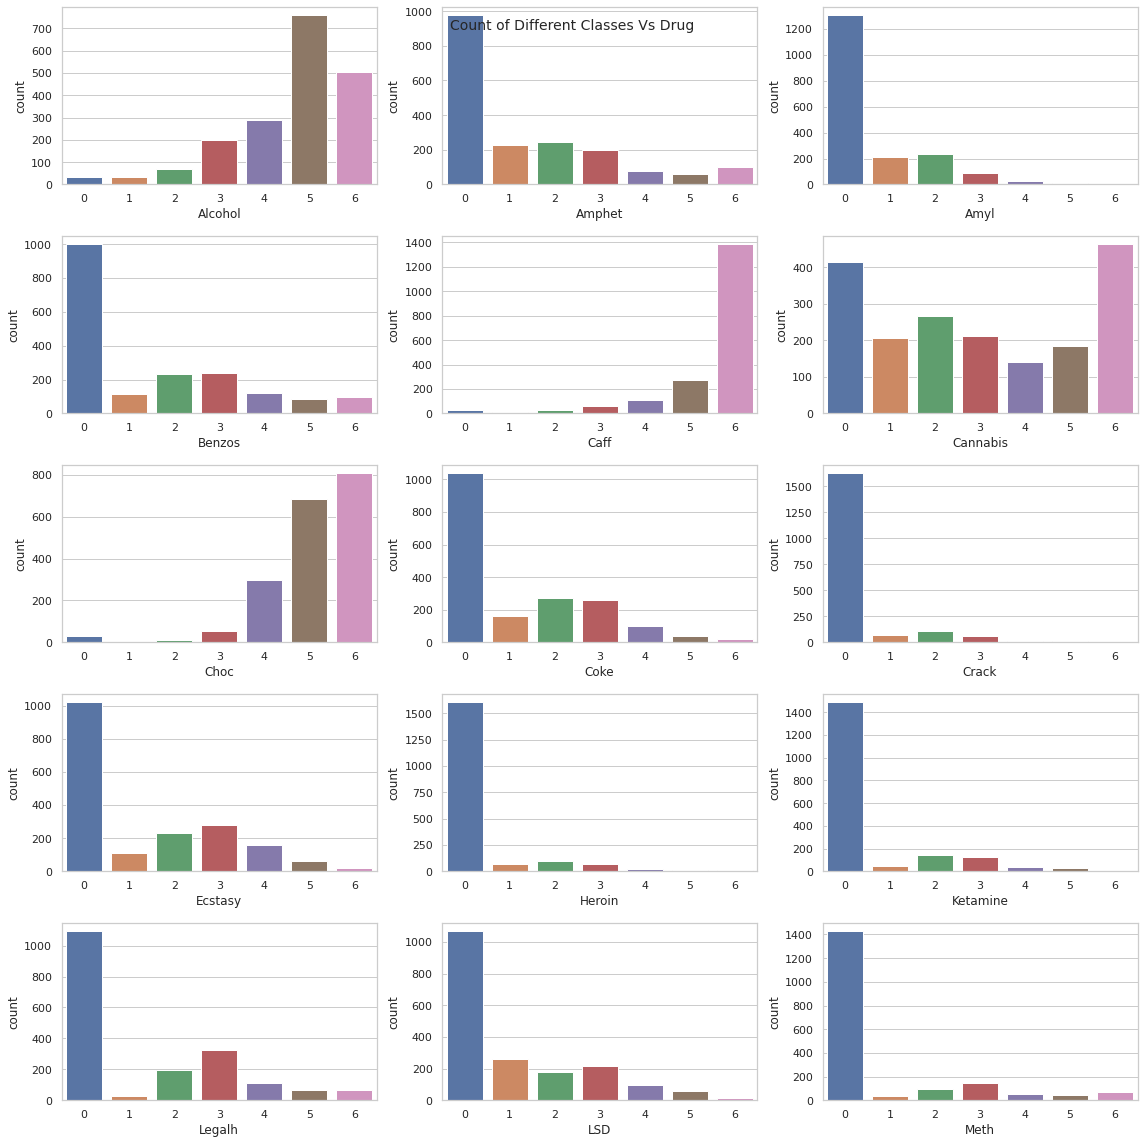

In [ ]:
#Visualization of the total amount of consumption for each drug
fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=columns[k], data=copy_df,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()


In [ ]:
#counting the total number of user or non user.
count_of_users = []
count_of_non_users = []

In [ ]:
for i in range(len(columns)):
    s = copy_df.groupby([cp[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

In [ ]:
#visualization of total user and non user of drug for every specific drug
trace1 = go.Bar(
    x=columns,
    y=count_of_users,
    name='User',
    marker = dict(color="rgb(117, 127, 221)")
)
trace2 = go.Bar(
    x=columns,
    y=count_of_non_users,
    name='Non-User',
    marker = dict(color="rgb(191, 221, 229)")
)


data = [trace1, trace2]
layout = go.Layout(
    title= 'Drug Vs User Or Non-user',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [ ]:
#visualization of popluation of drug addicted for specific countries on world map
df['Country'].value_counts()
con = ['UK','USA','Canada','Australia','Ireland','New Zealand']

In [ ]:
data = [dict(
        type='choropleth',
        locations = con,
        locationmode='country names',
        z=(df['Country'].value_counts().values),
        text=con,
        colorscale='portland',
        reversescale=True,
)]
layout = dict(
    title = 'A Map About Population of Drug Addicted in Each Country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world-map')


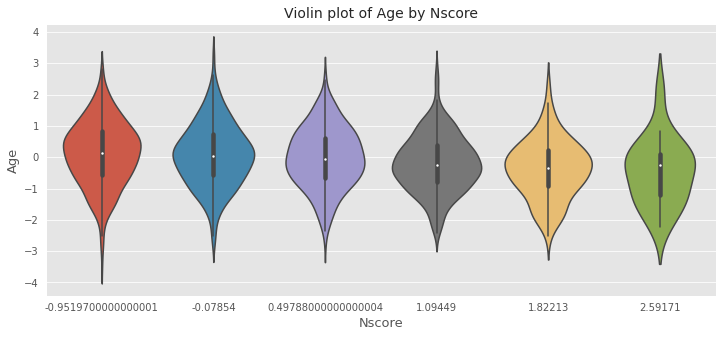

In [ ]:
#Violin plot of Age vs Nscore
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Nscore', data=df)
plt.title('Violin plot of Age by Nscore',fontsize=14)
plt.xlabel('Nscore',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

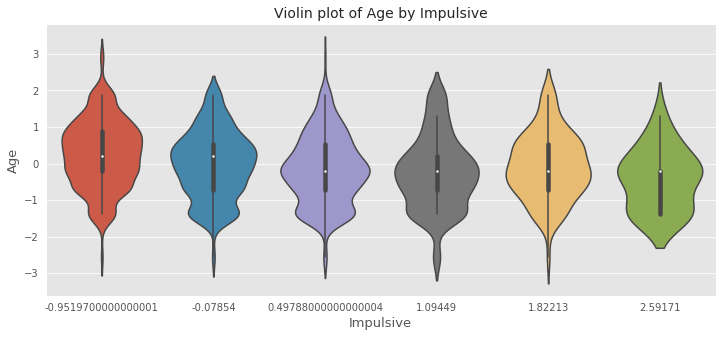

In [ ]:
#violin plot of Age vs Impulsive
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Impulsive', data=df)
plt.title('Violin plot of Age by Impulsive',fontsize=14)
plt.xlabel('Impulsive',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()


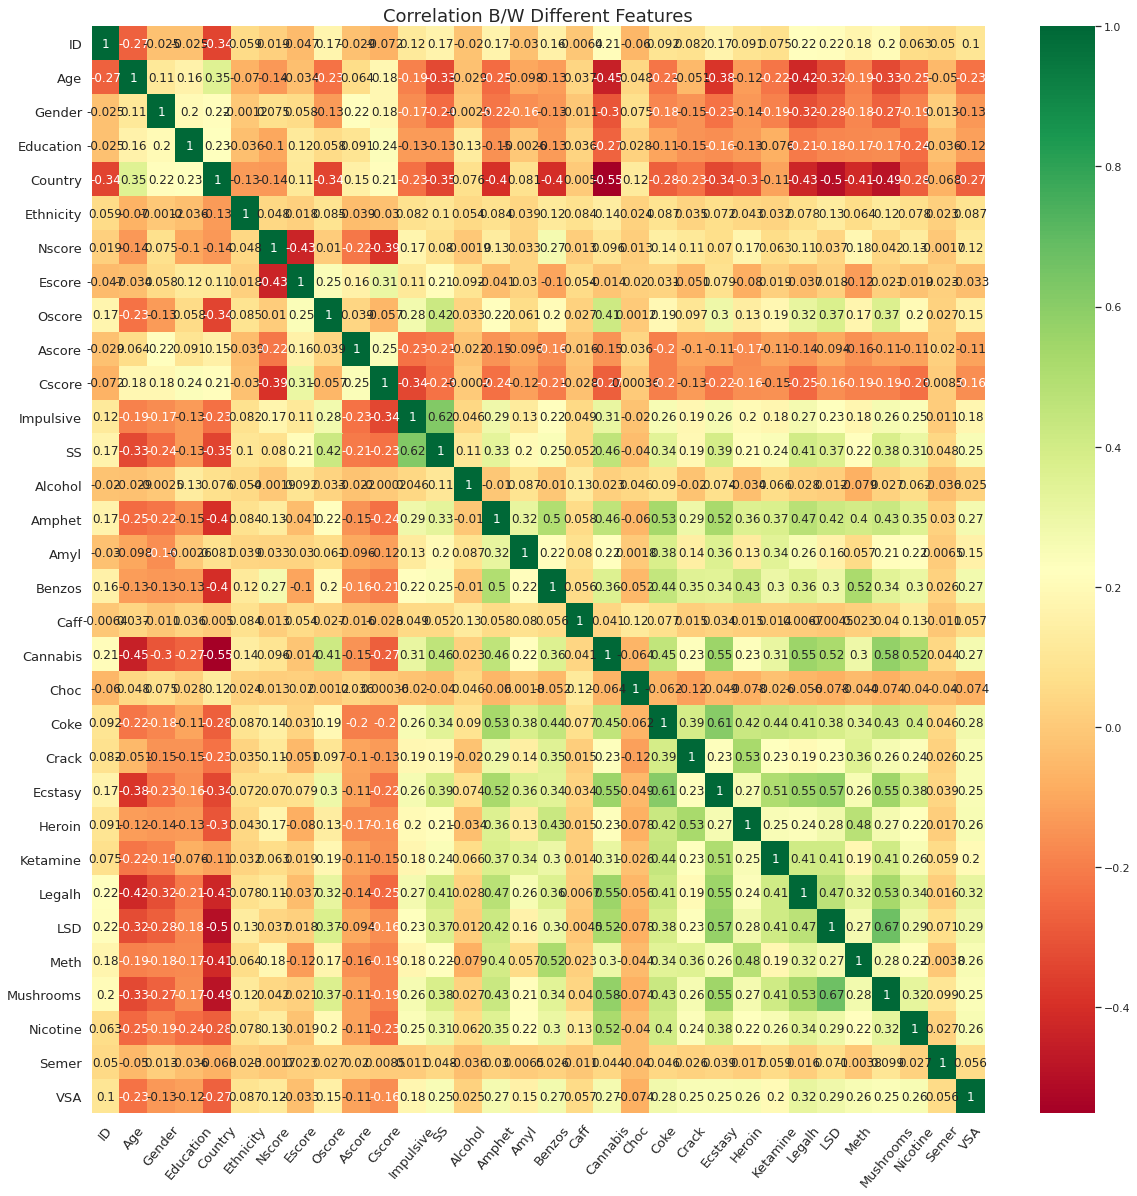

In [ ]:
#heatmap to find the correlation between different Features.
corrmat = df.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df.columns, xticklabels = df.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

In [ ]:
#Model Building
yp = []
for i in df['Benzos']:
    if(i==0):
        yp.append([1,0,0,0,0,0,0])
    elif(i==1):
        yp.append([0,1,0,0,0,0,0])
    elif(i==2):
        yp.append([0,0,1,0,0,0,0])
    elif(i==3):
        yp.append([0,0,0,1,0,0,0])
    elif(i==4):
        yp.append([0,0,0,0,1,0,0])
    elif(i==5):
        yp.append([0,0,0,0,0,1,0])
    elif(i==6):
        yp.append([0,0,0,0,0,0,1])
yp = np.array(yp)

In [ ]:
#yp data frame
yp

array([0.00669285, 0.00819568, 0.01003256, 0.01227603, 0.01501357,
       0.01835024, 0.0224116 , 0.02734679, 0.03333169, 0.04057176,
       0.04930426, 0.05979915, 0.07235796, 0.0873094 , 0.10500059,
       0.12578244, 0.14998817, 0.17790412, 0.20973382, 0.24555731,
       0.28529068, 0.32865255, 0.37514569, 0.42406149, 0.47451191,
       0.52548809, 0.57593851, 0.62485431, 0.67134745, 0.71470932,
       0.75444269, 0.79026618, 0.82209588, 0.85001183, 0.87421756,
       0.89499941, 0.9126906 , 0.92764204, 0.94020085, 0.95069574,
       0.95942824, 0.96666831, 0.97265321, 0.9775884 , 0.98164976,
       0.98498643, 0.98772397, 0.98996744, 0.99180432, 0.99330715])

In [ ]:
#feature selection
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['Benzos']

X = df[feature_col_names].values
y = df[predicted_class_names].values

In [ ]:
X

array([[ 0.49788,  0.48246, -0.05921, ..., -0.00665, -0.21712, -1.18084],
       [-0.07854, -0.48246,  1.98437, ..., -0.14277, -0.71126, -0.21575],
       [ 0.49788, -0.48246, -0.05921, ..., -1.0145 , -1.37983,  0.40148],
       ...,
       [-0.07854,  0.48246,  0.45468, ..., -1.38502,  0.52975, -0.52593],
       [-0.95197,  0.48246, -0.61113, ..., -2.57309,  1.29221,  1.2247 ],
       [-0.95197, -0.48246, -0.61113, ...,  0.41594,  0.88113,  1.2247 ]])

In [ ]:
y

array([[2],
       [0],
       [0],
       ...,
       [5],
       [0],
       [3]])

In [ ]:
yp

array([0.00669285, 0.00819568, 0.01003256, 0.01227603, 0.01501357,
       0.01835024, 0.0224116 , 0.02734679, 0.03333169, 0.04057176,
       0.04930426, 0.05979915, 0.07235796, 0.0873094 , 0.10500059,
       0.12578244, 0.14998817, 0.17790412, 0.20973382, 0.24555731,
       0.28529068, 0.32865255, 0.37514569, 0.42406149, 0.47451191,
       0.52548809, 0.57593851, 0.62485431, 0.67134745, 0.71470932,
       0.75444269, 0.79026618, 0.82209588, 0.85001183, 0.87421756,
       0.89499941, 0.9126906 , 0.92764204, 0.94020085, 0.95069574,
       0.95942824, 0.96666831, 0.97265321, 0.9775884 , 0.98164976,
       0.98498643, 0.98772397, 0.98996744, 0.99180432, 0.99330715])

In [ ]:
#splitting the data in test data and train data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, yp, test_size=0.30, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)

# Artificial Neural Network


In [ ]:
#building a neural network
num_inputs = len(X_train[0])
hidden_layer_neurons = 13
np.random.seed(4)
#setting weights and bias for hidden layer
b1 = 2*np.random.random(num_inputs) -1
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.72598647,  0.96680135, -0.67231552,  0.19466789, -0.9820278 ,
        -0.22685743, -0.91167988,  0.91330594, -0.12770671,  0.89795461,
         0.57261197,  0.7325786 , -0.65366916],
       [-0.85010283,  0.20148544, -0.66405563,  0.46676034, -0.18311228,
         0.05581765,  0.87514317,  0.04339224, -0.78361323, -0.68355319,
         0.0904053 ,  0.04880816,  0.27522049],
       [-0.19700911,  0.29961022, -0.20619999,  0.24783223,  0.53480993,
        -0.64205218, -0.24884846,  0.00506612,  0.37333416, -0.4926407 ,
         0.10948173,  0.24986169,  0.79100233],
       [-0.27429282,  0.27511415, -0.6171072 , -0.00441177, -0.63510919,
         0.83676608, -0.13635586,  0.6603762 , -0.16644739,  0.80933518,
        -0.19034957, -0.33765099,  0.14427754],
       [ 0.6908873 ,  0.72202862,  0.19137623, -0.83067678,  0.19453321,
        -0.50909258,  0.4651869 ,  0.78930258,  0.02946794,  0.20712702,
        -0.86986438,  0.08014946, -0.74162643],
       [ 0.22912569, -0.272699

In [ ]:
#setting the weights for output layer
num_outputs = 7
b2 = 2*np.random.random(num_inputs) -1
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.76310897, -0.24931971, -0.94045201,  0.07556333,  0.89165659,
        -0.10974961,  0.24830649],
       [ 0.2236247 ,  0.86675834,  0.46903811,  0.64964186, -0.32830118,
         0.81492929, -0.62958153],
       [-0.18403546,  0.47490395, -0.33308724,  0.77226846,  0.72131172,
        -0.66976376, -0.53850812],
       [-0.89513024,  0.7174417 , -0.32155018, -0.21350654, -0.45926904,
        -0.75354422, -0.08612152],
       [-0.53056589,  0.12630647, -0.5944699 ,  0.02277456,  0.89665177,
        -0.25633259,  0.90843818],
       [-0.88558817,  0.09761024,  0.19959498,  0.92350664,  0.85037026,
         0.02181226,  0.51897228],
       [ 0.95181056,  0.47300053,  0.90791195,  0.87778796, -0.03646568,
         0.31978846, -0.64030073],
       [-0.12595306,  0.73224838,  0.15446414, -0.44109279, -0.75442149,
        -0.5362896 , -0.75001487],
       [-0.53243914, -0.23283998, -0.91420294,  0.67742139, -0.19237948,
         0.13473793,  0.27226803],
       [-0.73431599, -0.8345

In [ ]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

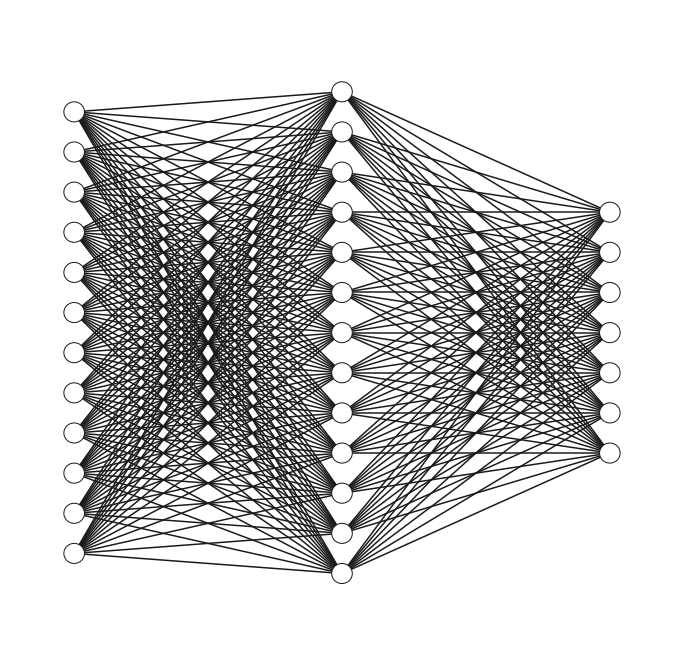

In [ ]:
#plotting the neural network
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [12, 13, 7])

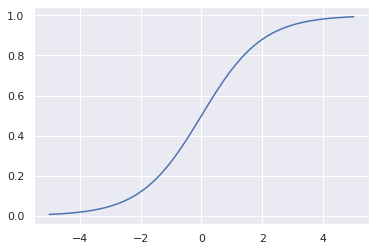

In [ ]:
# sigmoid function representation
xp = np.linspace( -5, 5, 50 )
yp = 1 / ( 1 + np.exp( -xp ) )
plt.plot( xp, yp )

In [ ]:
#back propagation for reducing error
error = []
b1=0
b2=0
learning_rate = 0.2 # slowly update the network
for epoch in range(1000):
    l1 = 1/(1 + np.exp(-(np.dot(X_train, w1) + b1))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2) +b2 )))
    er = (abs(y_train - l2)).mean()
    l2_delta = (y_train - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X_train.T.dot(l1_delta) * learning_rate
    error.append(er/(epoch*0.1))
    print('Error:', er)
#we updated the weights and biases of different layers    

In [ ]:
er = set(error)

Text(0.5, 0, 'Epoch')

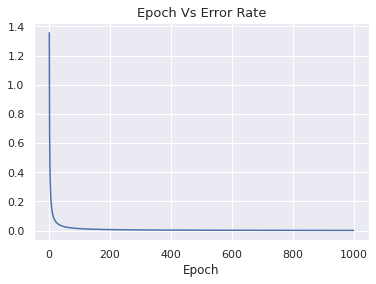

In [ ]:
#epoch vs error graph after back propagation
sp = pd.Series(error)
sp.plot()
plt.title("Epoch Vs Error Rate",fontsize=13)
plt.xlabel("Epoch")


In [ ]:
#normalizing the data between 0 & 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.15057952,  0.99924214,  1.20301976, ...,  0.44176972,
         0.1893589 , -0.23149658],
       [-1.13786206,  0.99924214,  1.20301976, ...,  0.28448414,
        -0.23637226, -1.24408017],
       [-1.13786206,  0.99924214,  0.46494083, ...,  3.04569532,
        -0.23637226,  1.27984023],
       ...,
       [-1.13786206, -1.00075844,  0.46494083, ..., -0.38458042,
         1.92360567,  1.27984023],
       [-0.15057952, -1.00075844,  1.20301976, ...,  0.14750159,
        -0.74972219,  0.41610828],
       [-1.13786206, -1.00075844, -0.64462925, ..., -1.24126946,
         0.90457272,  0.41610828]])

In [ ]:
#imporing the libraries required for model building
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer

In [ ]:
#fittting the model
classifier = Sequential()
# Adding the input layer and the first hidden layer
#rectified linear unit
classifier.add(Dense(30, activation='relu', input_dim=12))
#classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(16, activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the output layer
classifier.add(Dense(7, activation='sigmoid'))

In [ ]:
#using adam optiizer
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
classifier.fit(X_train, y_train, validation_split = 0.20, batch_size=100, epochs=1000,verbose=1)

In [ ]:
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
y_pred

array([6, 6, 5, 6, 5, 5, 1, 6, 1, 1, 6, 5, 5, 1, 1, 5, 1, 5, 1, 1, 6, 6,
       5, 6, 1, 6, 6, 5, 1, 1, 5, 6, 6, 6, 5, 1, 5, 1, 1, 1, 5, 1, 1, 1,
       5, 1, 1, 6, 6, 5, 5, 6, 5, 1, 1, 1, 4, 5, 5, 5, 6, 6, 6, 6, 1, 1,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 1, 6, 6, 1, 5, 1, 1, 5, 5, 1, 1, 6, 2,
       1, 5, 5, 6, 1, 6, 6, 1, 6, 5, 1, 5, 6, 5, 1, 5, 1, 1, 6, 5, 5, 1,
       1, 1, 6, 5, 1, 6, 5, 6, 6, 5, 5, 1, 6, 5, 1, 5, 1, 5, 1, 5, 6, 1,
       5, 6, 5, 1, 6, 1, 5, 1, 5, 1, 6, 1, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6,
       1, 5, 1, 1, 5, 1, 5, 1, 5, 1, 1, 1, 1, 5, 6, 4, 1, 5, 1, 2, 1, 1,
       6, 5, 1, 1, 5, 5, 1, 1, 5, 6, 1, 6, 5, 6, 1, 6, 5, 1, 6, 5, 1, 6,
       5, 6, 1, 6, 6, 6, 1, 6, 1, 1, 6, 1, 1, 1, 1, 1, 6, 6, 6, 6, 1, 6,
       1, 5, 1, 6, 1, 1, 1, 5, 6, 5, 1, 5, 5, 5, 5, 6, 1, 6, 1, 5, 1, 5,
       5, 6, 6, 6, 1, 1, 6, 6, 1, 5, 6, 5, 1, 6, 5, 6, 5, 1, 1, 1, 1, 1,
       6, 6, 6, 5, 1, 1, 1, 5, 6, 1, 5, 1, 5, 6, 5, 1, 6, 6, 1, 5, 1, 6,
       1, 5, 5, 5, 5, 5, 1, 6, 5, 5, 1, 5, 5, 5, 5,

In [ ]:
#@title


accu = metrics.accuracy_score(y_test,pred)
print("\nAcuuracy Of the Model: ",accu*100,"%","\n\n")




Acuuracy Of the Model:  69.08127208480566 % 




# SVM classification


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=2,random_state=0)
svm.fit(X_train1, y_train1.ravel())

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
X_train1

array([[-0.07854,  0.48246,  1.16365, ...,  0.41594,  0.19268, -0.21575],
       [-0.95197,  0.48246,  1.16365, ...,  0.25953, -0.21712, -1.18084],
       [-0.95197,  0.48246,  0.45468, ...,  3.00537, -0.21712,  1.2247 ],
       ...,
       [-0.95197, -0.48246,  0.45468, ..., -0.40581,  1.86203,  1.2247 ],
       [-0.07854, -0.48246,  1.16365, ...,  0.12331, -0.71126,  0.40148],
       [-0.95197, -0.48246, -0.61113, ..., -1.25773,  0.88113,  0.40148]])

In [ ]:
X_test1

array([[ 0.49788, -0.48246,  1.16365, ...,  0.41594, -1.37983, -2.07848],
       [ 1.09449,  0.48246,  0.45468, ...,  0.7583 , -2.55524, -0.52593],
       [-0.95197,  0.48246,  0.45468, ...,  0.93949,  0.19268, -0.21575],
       ...,
       [ 0.49788,  0.48246,  1.16365, ...,  0.93949, -0.21712, -0.84637],
       [-0.07854,  0.48246, -0.61113, ...,  0.41594,  1.29221,  1.92173],
       [-0.95197, -0.48246, -0.61113, ..., -1.5184 ,  1.29221,  0.40148]])

In [ ]:
y_train1

array([[0],
       [0],
       [3],
       ...,
       [2],
       [0],
       [3]])

In [ ]:
y_test1


In [ ]:

import sklearn.metrics as metrics

In [ ]:
pred = svm.predict(X_test1)
accu = metrics.accuracy_score(y_test1,pred)
print("\nAcuuracy Of the Model: ",accu*100,"%","\n\n")


Acuuracy Of the Model:  54.06360424028268 % 




# SVM for binary Classification


In [ ]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['User_Benzos']

X = copy_df[feature_col_names].values
y = copy_df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X

array([[ 0.49788,  0.48246, -0.05921, ..., -0.00665, -0.21712, -1.18084],
       [-0.07854, -0.48246,  1.98437, ..., -0.14277, -0.71126, -0.21575],
       [ 0.49788, -0.48246, -0.05921, ..., -1.0145 , -1.37983,  0.40148],
       ...,
       [-0.07854,  0.48246,  0.45468, ..., -1.38502,  0.52975, -0.52593],
       [-0.95197,  0.48246, -0.61113, ..., -2.57309,  1.29221,  1.2247 ],
       [-0.95197, -0.48246, -0.61113, ...,  0.41594,  0.88113,  1.2247 ]])

In [ ]:
y

array([['User'],
       ['Non-user'],
       ['Non-user'],
       ...,
       ['User'],
       ['Non-user'],
       ['User']], dtype=object)

In [ ]:
svm = SVC(kernel="linear", C=1,random_state=0)
svm.fit(X_train, y_train.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred = svm.predict(X_test1)
accu = metrics.accuracy_score(y_test,pred)
print("\nAcuuracy Of the Model: ",accu*100,"%","\n\n")


Acuuracy Of the Model:  69.96466431095406 % 




# Decision Tree for Binary Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred = clf_dtc.predict(X_test1)
accu = metrics.accuracy_score(y_test,pred)
print("\nAcuuracy Of the Model: ",accu*100,"%","\n\n")


Acuuracy Of the Model:  69.08127208480566 % 




In [ ]:

from plotly.offline import iplot

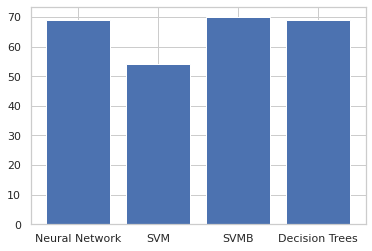

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Neural Network","SVM","SVMB","Decision Trees"])
y = np.array([69.08,54.06,69.96,69.08])

plt.bar(x,y)
plt.show()

